In [1]:
import numpy, seaborn

In [2]:
import pandas
pandas.set_option('display.max_colwidth', None)

In [3]:
import scipy, scipy.signal, scipy.optimize
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [5]:
idmap = pandas.read_csv('idmap.tsv', sep='\t')
idmap

,ensembl,uniprot,protein_name
0,ENSG00000000003,O43657,TSN6_HUMAN
1,ENSG00000000419,O60762,DPM1_HUMAN
2,ENSG00000000419,O60762,Q5QPK2_HUMAN
3,ENSG00000000419,O60762,H0Y368_HUMAN
4,ENSG00000000419,Q5QPK2,DPM1_HUMAN
...,...,...,...
16056,ENSG00000292348,A0A096LP69,CD99_HUMAN
16057,ENSG00000292348,P14209,A0A096LP69_HUMAN
16058,ENSG00000292348,P14209,CD99_HUMAN
16059,ENSG00000292358,O43824,GTPB6_HUMAN


In [6]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.head()

,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
0,1659,True,Q01105|SET_HUMAN,61.25,38.28,11,11,Deamidation (NQ),66207.93000,64782.70300,...,81107.9400,98496.01600,87415.87500,103506.5900,75880.66400,121937.48400,104535.27000,1.00:0.92:0.82:1.05:0.94:1.14:1.02:1.20:0.88:1.42:1.21,33489,Protein SET OS=Homo sapiens OX=9606 GN=SET PE=1 SV=3
1,1106,True,P30520|PURA2_HUMAN,45.54,36.18,14,14,Carbamidomethylation; Deamidation (NQ); Oxidation (M),37504.72700,38062.02700,...,72672.8600,60703.20300,53407.13000,77803.8050,45081.79000,64530.84000,61178.14000,1.00:0.99:1.05:0.96:1.41:1.18:1.04:1.51:0.87:1.25:1.19,50097,Adenylosuccinate synthetase isozyme 2 OS=Homo sapiens OX=9606 GN=ADSS2 PE=1 SV=3
2,5753,True,H3BSJ5|H3BSJ5_HUMAN,9.74,13.78,2,2,NaN,710.18670,1787.54140,...,745.0441,970.74500,1280.93070,1131.4752,1574.30470,1760.64750,1590.41820,1.00:1.01:0.82:1.45:0.70:0.91:1.20:1.06:1.48:1.66:1.50,31232,Ubiquinone biosynthesis protein OS=Homo sapiens OX=9606 GN=COQ9 PE=1 SV=1
3,189,True,Q92900|RENT1_HUMAN,37.55,49.07,40,40,Carbamidomethylation; Deamidation (NQ); Oxidation (M),50964.09400,57867.21000,...,48297.3050,32894.06600,22484.96300,17478.6330,49582.24600,17853.52300,49794.11300,1.00:1.25:1.19:1.66:1.18:0.80:0.55:0.43:1.21:0.43:1.21,124345,Regulator of nonsense transcripts 1 OS=Homo sapiens OX=9606 GN=UPF1 PE=1 SV=2
4,6355,True,B7ZBQ3|B7ZBQ3_HUMAN,78.08,9.66,1,1,Carbamidomethylation,328.46777,359.28754,...,558.0640,735.69476,709.92926,1059.3608,401.92883,776.32916,701.92194,1.00:0.89:0.54:0.73:0.96:1.26:1.22:1.82:0.69:1.33:1.20,15923,Mediator of RNA polymerase II transcription subunit 20 OS=Homo sapiens OX=9606 GN=MED20 PE=1 SV=1


In [7]:
treatment4_labels = []
control4_labels = []
for element in df.columns:
    if 'ADRNOR_24H_' in element:
        treatment4_labels.append(element)
    if 'CTRL_24H_' in element:
        control4_labels.append(element)

all_labels = treatment4_labels + control4_labels

print(len(treatment4_labels), treatment4_labels)
print(len(control4_labels), control4_labels)
print(len(all_labels), all_labels)

6 ['ADRNOR_24H_1_1_2931 Area', 'ADRNOR_24H_1_2_2932 Area', 'ADRNOR_24H_2_1_2934 Area', 'ADRNOR_24H_2_2_2935 Area', 'ADRNOR_24H_3_1_2937 Area', 'ADRNOR_24H_3_2_2938 Area']
6 ['CTRL_24H_1_1_2840 Area', 'CTRL_24H_1_2_2841 Area', 'CTRL_24H_2_1_2843 Area', 'CTRL_24H_2_2_2844 Area', 'CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']
12 ['ADRNOR_24H_1_1_2931 Area', 'ADRNOR_24H_1_2_2932 Area', 'ADRNOR_24H_2_1_2934 Area', 'ADRNOR_24H_2_2_2935 Area', 'ADRNOR_24H_3_1_2937 Area', 'ADRNOR_24H_3_2_2938 Area', 'CTRL_24H_1_1_2840 Area', 'CTRL_24H_1_2_2841 Area', 'CTRL_24H_2_1_2843 Area', 'CTRL_24H_2_2_2844 Area', 'CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']


In [8]:
# consider a histogram of linear and log
# consider a cv along intensity for bioreplicates and technical replicates
# do a pca

In [9]:
median_treatment = numpy.median(numpy.log2(df.loc[:, treatment4_labels] + 1), axis=1)
median_controls = numpy.median(numpy.log2(df.loc[:, control4_labels] + 1), axis=1)
log2FC = median_treatment - median_controls
df.insert(0, 'log2FC', log2FC)

In [10]:
# there are 2,074 duplicated measurements
print(df.shape)

duplicate_rows = df.duplicated(subset=all_labels)
print(sum(duplicate_rows))

df.drop_duplicates(subset=all_labels, inplace=True)
print(df.shape)

(7841, 89)
2074
(5767, 89)


In [11]:
# eliminate rows of log2FC == 0
df = df[df['log2FC'] != 0]
df.shape

(5759, 89)

In [12]:
result = scipy.stats.ttest_ind(numpy.log10(df.loc[:, treatment4_labels] + 1), 
                               numpy.log10(df.loc[:, control4_labels] + 1), 
                               axis=1)
df.insert(0, 'Student P', result.pvalue)
print(df[df['Student P'] < 0.05].shape)

(2413, 90)


In [13]:
# check if log2FC equal to z
df[df['Student P'].isna() == True]

# # fix it!
# location =df[df['Student P'].isna() == True].index.values[0]
# df.at[location, 'Student P'] = 1
# df[df['Student P'].isna() == True]

,Student P,log2FC,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description


In [14]:
corrected = statsmodels.stats.multitest.multipletests(df['Student P'].values, method='fdr_bh', alpha=0.05)
df.insert(0, 'adjusted Student P', corrected[1])
print(sum(corrected[0]), 'proteins passed significance')

1786 proteins passed significance


In [15]:
df

,adjusted Student P,Student P,log2FC,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
0,0.649170,0.517217,-0.001041,1659,True,Q01105|SET_HUMAN,61.25,38.28,11,11,...,81107.9400,98496.01600,87415.87500,103506.5900,75880.66400,121937.48400,104535.27000,1.00:0.92:0.82:1.05:0.94:1.14:1.02:1.20:0.88:1.42:1.21,33489,Protein SET OS=Homo sapiens OX=9606 GN=SET PE=1 SV=3
1,0.022183,0.004957,-0.362995,1106,True,P30520|PURA2_HUMAN,45.54,36.18,14,14,...,72672.8600,60703.20300,53407.13000,77803.8050,45081.79000,64530.84000,61178.14000,1.00:0.99:1.05:0.96:1.41:1.18:1.04:1.51:0.87:1.25:1.19,50097,Adenylosuccinate synthetase isozyme 2 OS=Homo sapiens OX=9606 GN=ADSS2 PE=1 SV=3
2,0.642579,0.509408,0.041272,5753,True,H3BSJ5|H3BSJ5_HUMAN,9.74,13.78,2,2,...,745.0441,970.74500,1280.93070,1131.4752,1574.30470,1760.64750,1590.41820,1.00:1.01:0.82:1.45:0.70:0.91:1.20:1.06:1.48:1.66:1.50,31232,Ubiquinone biosynthesis protein OS=Homo sapiens OX=9606 GN=COQ9 PE=1 SV=1
3,0.074568,0.026414,0.567790,189,True,Q92900|RENT1_HUMAN,37.55,49.07,40,40,...,48297.3050,32894.06600,22484.96300,17478.6330,49582.24600,17853.52300,49794.11300,1.00:1.25:1.19:1.66:1.18:0.80:0.55:0.43:1.21:0.43:1.21,124345,Regulator of nonsense transcripts 1 OS=Homo sapiens OX=9606 GN=UPF1 PE=1 SV=2
4,0.045739,0.013724,-0.506240,6355,True,B7ZBQ3|B7ZBQ3_HUMAN,78.08,9.66,1,1,...,558.0640,735.69476,709.92926,1059.3608,401.92883,776.32916,701.92194,1.00:0.89:0.54:0.73:0.96:1.26:1.22:1.82:0.69:1.33:1.20,15923,Mediator of RNA polymerase II transcription subunit 20 OS=Homo sapiens OX=9606 GN=MED20 PE=1 SV=1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7829,0.791448,0.690713,-0.432489,1424,True,Q9H5N1|RABE2_HUMAN,18.84,24.60,12,12,...,16276.4430,19019.43600,14679.40300,19035.4920,10940.90600,16310.35400,14417.22700,1.00:0.71:0.84:0.77:1.08:1.26:0.98:1.26:0.73:1.08:0.96,63543,Rab GTPase-binding effector protein 2 OS=Homo sapiens OX=9606 GN=RABEP2 PE=1 SV=2
7832,0.767633,0.657267,0.157276,1507,True,Q96RT1|ERBIN_HUMAN,40.78,3.47,3,3,...,2630.4650,1398.36020,1369.58140,1376.7139,1539.97270,1507.89050,2000.28120,1.00:1.16:1.57:1.42:1.57:0.83:0.82:0.82:0.92:0.90:1.19,158298,Erbin OS=Homo sapiens OX=9606 GN=ERBIN PE=1 SV=2
7834,0.078863,0.028469,0.957727,1805,True,Q5SX86|Q5SX86_HUMAN,13.86,10.97,12,1,...,1214.4363,1514.24710,1479.77690,793.6976,1943.42720,1976.10340,1352.22550,1.00:1.16:1.59:1.01:1.21:1.51:1.48:0.79:1.94:1.97:1.35,17783,Rab GDP dissociation inhibitor (Fragment) OS=Homo sapiens OX=9606 GN=GDI2 PE=1 SV=1
7836,0.405864,0.269462,-0.223649,89,True,E9PLY5|E9PLY5_HUMAN,3.53,0.87,62,1,...,2464.1526,1881.44900,2357.67920,2336.5410,1809.34180,1682.26590,2408.92400,1.00:0.77:1.05:0.99:1.06:0.81:1.02:1.01:0.78:0.72:1.04,159923,"Microtubule-actin cross-linking factor 1, isoforms 1/2/3/5 (Fragment) OS=Homo sapiens OX=9606 GN=MACF1 PE=1 SV=1"


In [16]:
%%time

passed = 0
fc_threshold = numpy.log2(115/100)
p_threshold = 0.05

storage_file = 'colored_proteins_24.tsv'
f = open(storage_file, 'w')
f.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format('Uniprot_ID', 'Uniprot_gene_ID', 'Gene_name', 'ENSEMBL', 'Description', 'Color_in_plot', 'log2FC', 'Adjusted_P_value'))

for i in range(len(corrected[0])):
    if corrected[0][i] == True:
        passed = passed + 1

        uniprot_id = df.iloc[i, :]['Accession'].split('|')[0]
        uniprot_geneid = df.iloc[i, :]['Accession'].split('|')[1]
        hits = list(set(idmap[idmap['uniprot'] == uniprot_id]['ensembl'].values))
        ensemblids = ','.join(hits)
        adjusted = corrected[1][i]
        fc = df.iloc[i, :]['log2FC']
        description = df.iloc[i, :]['Description'].split('OS=')[0]
        if 'GN' in df.iloc[i, :]['Description']:
            gene_name = df.iloc[i, :]['Description'].split('GN=')[1].split(' ')[0]
        else:
            gene_name = 'NA'

        # define color
        color='not defined'
        if fc < -fc_threshold:
            color = 'blue'
        if fc > fc_threshold:
            color = 'red'
        if (fc > 0) & (fc < fc_threshold):
            color = 'orange'
        if (fc < 0) & (fc > -fc_threshold):
            color = 'green'
        
        f.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(uniprot_id, uniprot_geneid, gene_name, ensemblids, description, color, fc, adjusted))

f.close()

CPU times: user 1.42 s, sys: 5.53 ms, total: 1.43 s
Wall time: 1.43 s


blue
(1390, 91)

red
(282, 91)

orange
(21, 91)

green
(93, 91)



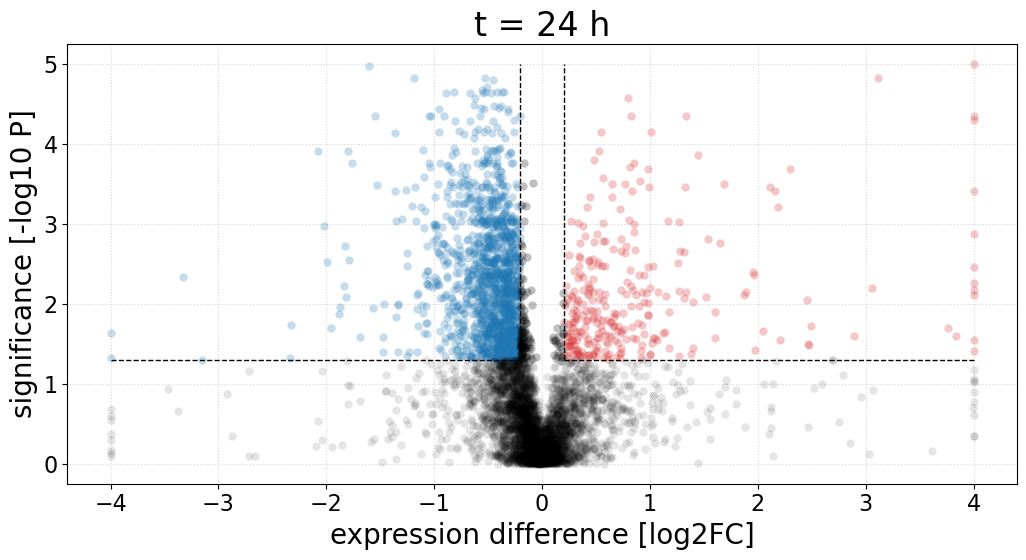

In [17]:
fc_threshold = numpy.log2(115/100)
p_threshold = 0.05

print('blue')
subdf = df[(df['adjusted Student P'] < p_threshold) & (df['log2FC'] < -fc_threshold)]
print(subdf.shape)
x = numpy.clip(subdf['log2FC'], a_min=-4, a_max=0)
y = numpy.clip(-numpy.log10(subdf['adjusted Student P']), a_min=0, a_max=5)
matplotlib.pyplot.plot(x, y, 'o', color='tab:blue', alpha=1/4, mec='none')
print()

print('red')
subdf = df[(df['adjusted Student P'] < p_threshold) & (df['log2FC'] > fc_threshold)]
print(subdf.shape)
x = numpy.clip(subdf['log2FC'], a_min=0, a_max=4)
y = numpy.clip(-numpy.log10(subdf['adjusted Student P']), a_min=0, a_max=5)
matplotlib.pyplot.plot(x, y, 'o', color='tab:red', alpha=1/4, mec='none')
print()

subdf = df[(df['adjusted Student P'] > p_threshold)]
x = numpy.clip(subdf['log2FC'], a_min=-4, a_max=4)
y = -numpy.log10(subdf['adjusted Student P'])
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/10, mec='none')

print('orange')
subdf = df[(df['adjusted Student P'] < p_threshold) & (df['log2FC'] > 0) & (df['log2FC'] < fc_threshold)]
print(subdf.shape)
x = subdf['log2FC']
y = -numpy.log10(subdf['adjusted Student P'])
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/4, mec='none')
print()

print('green')
subdf = df[(df['adjusted Student P'] < p_threshold) & (df['log2FC'] < 0) & (df['log2FC'] > -fc_threshold)]
print(subdf.shape)
x = subdf['log2FC']
y = -numpy.log10(subdf['adjusted Student P'])
matplotlib.pyplot.plot(x, y, 'o', color='black', alpha=1/4, mec='none')
print()

matplotlib.pyplot.plot([-fc_threshold, -fc_threshold], [-numpy.log10(p_threshold), 5], ls='--', color='black', lw=1)
matplotlib.pyplot.plot([fc_threshold, fc_threshold], [-numpy.log10(p_threshold), 5], ls='--', color='black', lw=1)
matplotlib.pyplot.plot([-4, -fc_threshold], [-numpy.log10(p_threshold), -numpy.log10(p_threshold)], ls='--', color='black', lw=1)
matplotlib.pyplot.plot([fc_threshold, 4], [-numpy.log10(p_threshold), -numpy.log10(p_threshold)], ls='--', color='black', lw=1)
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.xlabel('expression difference [log2FC]')
matplotlib.pyplot.ylabel('significance [-log10 P]')
matplotlib.pyplot.title('t = 24 h')
matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('twentyfour.svg')

/Users/adrian/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/adrian/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


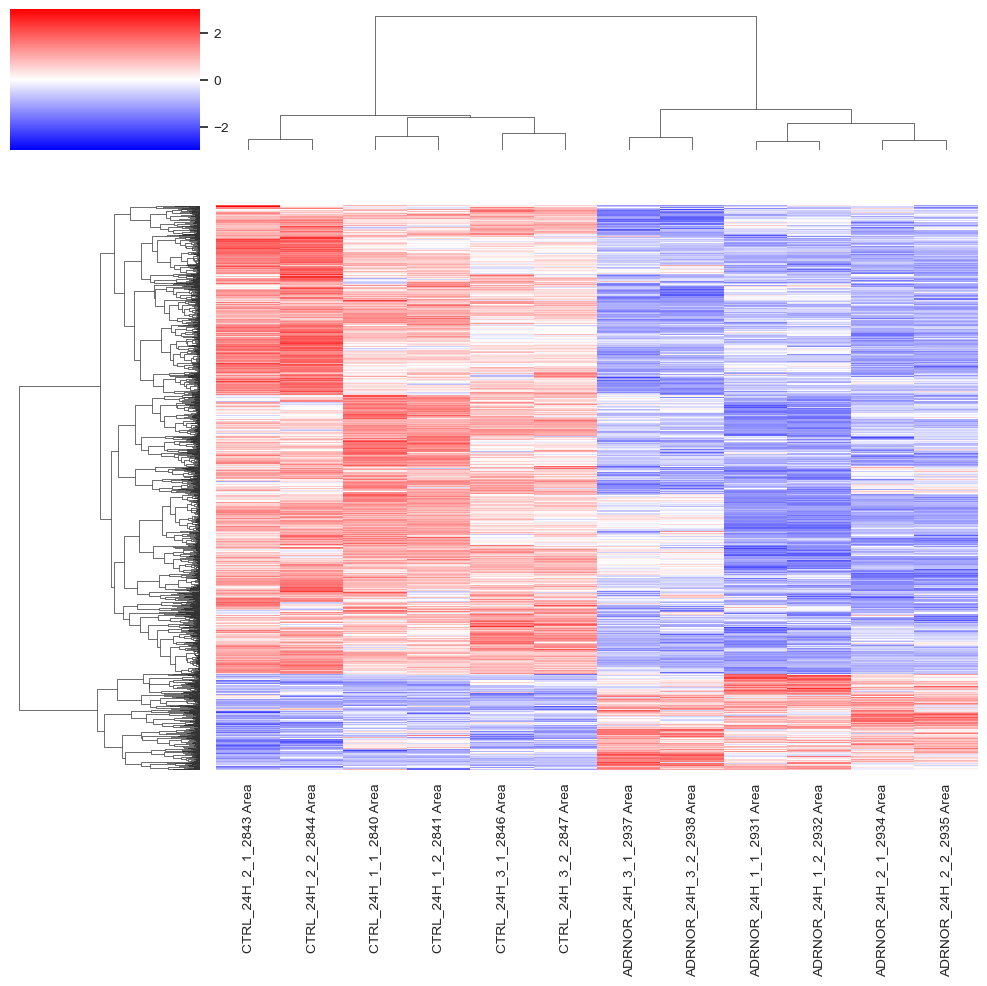

In [18]:
plotting_df = df[(df['adjusted Student P'] < p_threshold)][all_labels]

# generate heatmap
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(plotting_df, 
                   cmap='bwr', 
                   z_score=0, 
                   method=linkage_method, metric=distance_metric, 
                  yticklabels=0, vmin=-3, vmax=3)
matplotlib.pyplot.tight_layout()

adr4_a 	 ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area
adr4_b 	 ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area
adr4_c 	 ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area
ctl4_a 	 CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area
ctl4_b 	 CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area
ctl4_c 	 CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area
adr24_a 	 ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area
adr24_b 	 ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area
adr24_c 	 ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area
ctl24_a 	 CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area
ctl24_b 	 CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area
ctl24_c 	 CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area
(1786, 12)


/Users/adrian/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/adrian/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


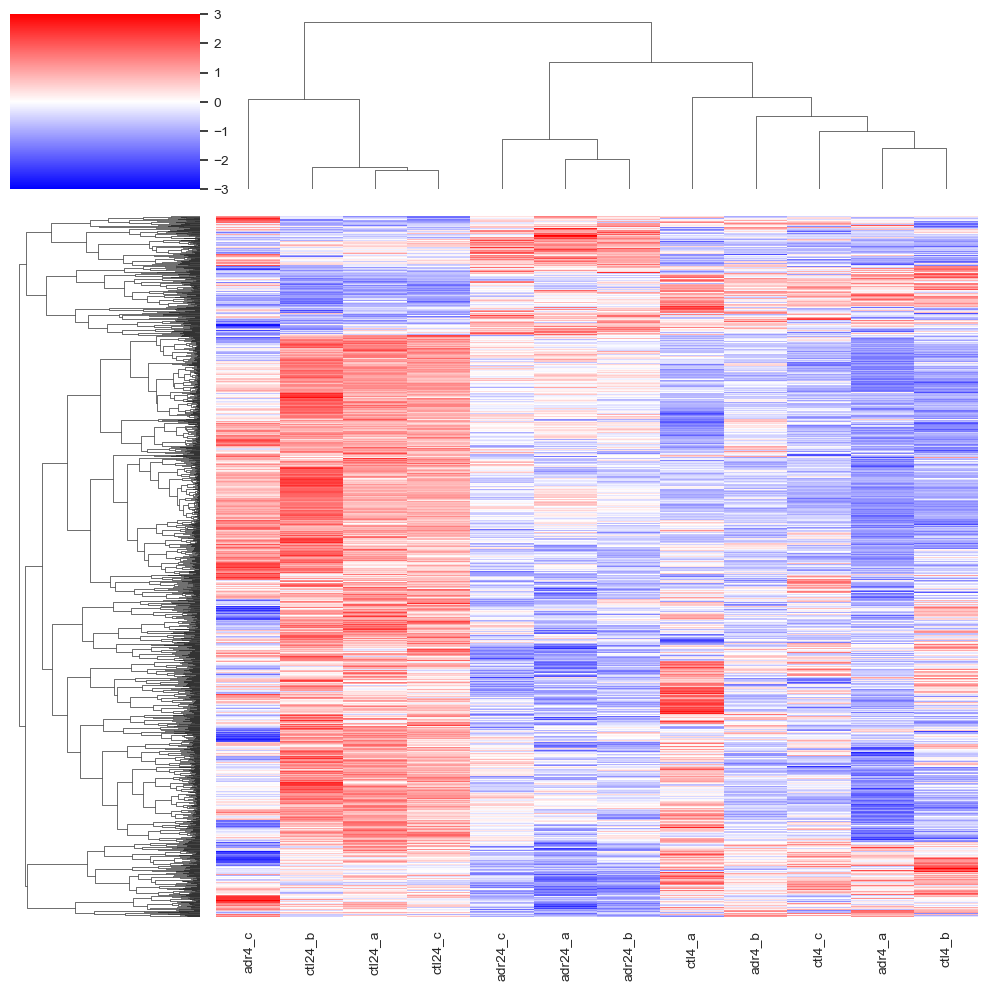

In [19]:
labels = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        labels.append(element)
    if 'CTRL_4H_' in element:
        labels.append(element)
    if 'ADRNOR_24H_' in element:
        labels.append(element)
    if 'CTRL_24H_' in element:
        labels.append(element)

working_labels=['adr4_a', 'adr4_b', 'adr4_c', 'ctl4_a', 'ctl4_b', 'ctl4_c', 'adr24_a', 'adr24_b', 'adr24_c', 'ctl24_a', 'ctl24_b', 'ctl24_c']
for i in range(12):
    print(working_labels[i], '\t', labels[i*2], labels[(i*2)+1])
    df.insert(0, working_labels[i], df.loc[:, [labels[i*2], labels[(i*2)+1]]].median(axis=1))

plotting_df = df[(df['adjusted Student P'] < p_threshold)][working_labels]
print(plotting_df.shape)

seaborn.set(font_scale=0.9)
seaborn.clustermap(plotting_df, 
                   cmap='bwr', 
                   z_score=0, 
                   method=linkage_method, metric=distance_metric, 
                  yticklabels=0, vmin=-3, vmax=3)

matplotlib.pyplot.tight_layout()